In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

from datetime import date
%matplotlib inline
from pandas.tseries.offsets import MonthEnd

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [26]:
##loading the dataset

df = pd.read_csv('salary.csv')
df.head(7)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Machine Learning Research Engineer,60000,GBP,72088,GB,0,GB,L
1,2023,EN,PT,Data Analyst,24000,EUR,25216,ES,100,US,L
2,2023,SE,FT,Research Scientist,210000,USD,210000,US,0,US,M
3,2023,SE,FT,Research Scientist,165750,USD,165750,US,0,US,M
4,2023,SE,FT,Machine Learning Scientist,225000,USD,225000,US,100,US,M
5,2023,SE,FT,Machine Learning Scientist,165750,USD,165750,US,100,US,M
6,2023,MI,FT,Machine Learning Engineer,89700,GBP,107772,GB,0,GB,M


In [27]:
##full check on the data description

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2054 entries, 0 to 2053
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2054 non-null   int64 
 1   experience_level    2054 non-null   object
 2   employment_type     2054 non-null   object
 3   job_title           2054 non-null   object
 4   salary              2054 non-null   int64 
 5   salary_currency     2054 non-null   object
 6   salary_in_usd       2054 non-null   int64 
 7   employee_residence  2054 non-null   object
 8   remote_ratio        2054 non-null   int64 
 9   company_location    2054 non-null   object
 10  company_size        2054 non-null   object
dtypes: int64(4), object(7)
memory usage: 176.6+ KB


In [28]:
df.shape

(2054, 11)

In [29]:
df.salary_in_usd.max()

450000

In [30]:
maxValue = df.max()
print(maxValue)

work_year                             2023
experience_level                        SE
employment_type                         PT
job_title             Staff Data Scientist
salary                            30400000
salary_currency                        USD
salary_in_usd                       450000
employee_residence                      VN
remote_ratio                           100
company_location                        US
company_size                             S
dtype: object


## PROBLEM 1
- Finding the highest paid job title.
- Finding the highest paid job title with respect to experience level and employment type.

In [31]:
## finding the highest paid job-title for each year.

highest_paid_job = df.groupby('work_year')[['job_title', 'salary_in_usd']].max()
highest_paid_job

,job_title,salary_in_usd
work_year,,
2020,Research Scientist,450000
2021,Staff Data Scientist,423000
2022,Research Scientist,430967
2023,Research Scientist,310000


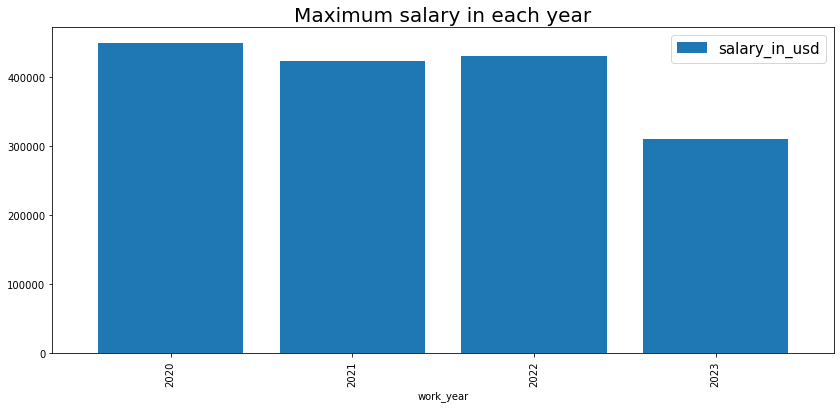

In [32]:
highest_paid_job.plot(kind = 'bar', width = 0.8, figsize = (14,6))
plt.legend(bbox_to_anchor =(1,1), fontsize = 15)
plt.title("Maximum salary in each year", fontsize = 20)
plt.show()

In [33]:
## finding the highest paid job title with respect to experience level and employment type

HPJ = df.groupby('work_year')[['job_title', 'salary_in_usd','experience_level', 'employment_type']].max()
HPJ
#Where SE== SENIOR LEVEL and PT==PART-TIME

,job_title,salary_in_usd,experience_level,employment_type
work_year,,,,
2020,Research Scientist,450000,SE,PT
2021,Staff Data Scientist,423000,SE,PT
2022,Research Scientist,430967,SE,PT
2023,Research Scientist,310000,SE,PT


In [34]:
# Highest paying job with annual salary income above $300,000 for each year

max_salary = df.groupby(['work_year', 'job_title', 'experience_level']).filter(lambda x: x['salary_in_usd'].max() >= 300000)
max_salary = max_salary.groupby(['work_year', 'job_title', 'experience_level'])[['salary_in_usd']].max()
max_salary

salary_in_usd
work_year job_title                          experience_level               
2020      Data Scientist                     SE                       412000
          Director of Data Science           EX                       325000
          Research Scientist                 MI                       450000
2021      Applied Machine Learning Scientist MI                       423000
          Principal Data Scientist           EX                       416000
2022      Applied Data Scientist             SE                       380000
          Data Analyst                       MI                       430967
          Data Analytics Lead                SE                       405000
          Data Architect                     SE                       345600
          Data Engineer                      EX                       324000
                                             SE                       315000
          Data Science Manager               SE                       300000
          Data Science Tech Lead             SE                       375000
          Data Scientist                     SE                       350000
          Research Scientist                 SE                       300000
2023      Data Engineer                      SE                       310000

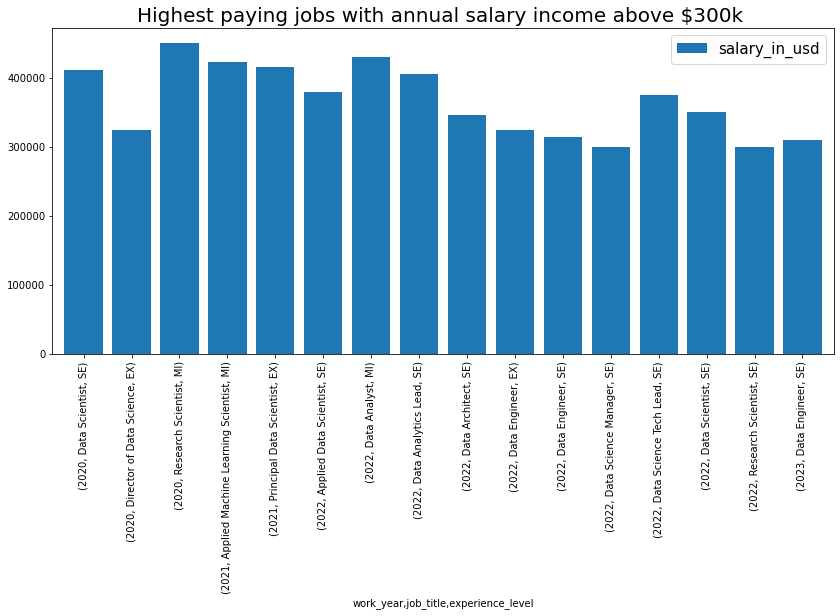

In [35]:
# Visualization for Qstn 1b

max_salary.plot(kind = 'bar', width = 0.8, figsize = (14,6))
plt.legend(bbox_to_anchor =(1,1), fontsize = 15)
plt.title("Highest paying jobs with annual salary income above $300k ", fontsize = 20)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_4408\4225181609.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['datetime'] = pd.to_datetime(df_filtered['work_year'], format='%Y') + MonthEnd(1)


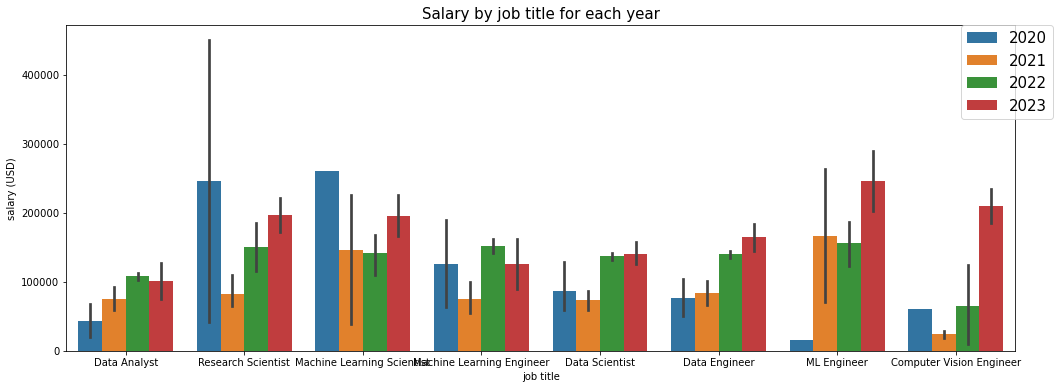

In [36]:
# find the common job titles
# highest salary for the common job title in 2020 - 2023

common_titles = set(df['job_title'].unique())
for work_year in df['work_year'].unique():
    common_titles = common_titles.intersection(set(df[df['work_year']==work_year]['job_title'].unique()))

# filter the DataFrame to include only the common job titles
df_filtered = df[df['job_title'].isin(common_titles)]

# create the 'datetime' column
df_filtered['datetime'] = pd.to_datetime(df_filtered['work_year'], format='%Y') + MonthEnd(1)

# plot the bar chart
plt.figure(figsize=(17, 6))
sns.barplot(data=df_filtered, x='job_title', y='salary_in_usd', hue='work_year')
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0, fontsize=15)
plt.title('Salary by job title for each year', fontsize=15)
plt.ylabel('salary (USD)', fontsize=10)
plt.xlabel('job title', fontsize=10)
plt.show()

## PROBLEM 2
- Find out if the employee residence influences the percentage of getting a job


In [37]:
unique_emp_resid = df['employee_residence'].unique()
unique_emp_resid

array(['GB', 'ES', 'US', 'PT', 'IN', 'NL', 'CA', 'AU', 'PK', 'FR', 'IT',
       'MA', 'PL', 'CO', 'MX', 'DE', 'AR', 'LT', 'BE', 'AS', 'IR', 'HU',
       'CH', 'AT', 'SK', 'CN', 'BR', 'NG', 'CZ', 'CR', 'TR', 'CL', 'PR',
       'FI', 'TH', 'GR', 'DK', 'BO', 'PH', 'DO', 'SG', 'EG', 'ID', 'AE',
       'IE', 'SI', 'MY', 'JP', 'EE', 'HN', 'TN', 'RU', 'DZ', 'VN', 'IQ',
       'UA', 'BG', 'JE', 'RS', 'KE', 'NZ', 'RO', 'HK', 'MD', 'LU', 'HR',
       'MT'], dtype=object)

In [38]:
#finding out if the employee residence influences the percentage of getting a job

employee_res = df.loc[df['salary_in_usd'] >150000].groupby('employee_residence')[[
    'job_title', 'salary_in_usd', 'experience_level', 'remote_ratio']].max()
employee_res

,job_title,salary_in_usd,experience_level,remote_ratio
employee_residence,,,,
BR,Cloud Data Engineer,160000,SE,100
CA,Research Scientist,248400,SE,100
DE,Principal Data Scientist,173762,SE,100
ES,Data Engineering Manager,193000,SE,100
GB,Marketing Data Analyst,430967,SE,100
IN,AI Scientist,200000,MI,100
IT,Director of Data Science,153667,EX,100
JP,Machine Learning Scientist,260000,SE,0
MX,Machine Learning Engineer,255000,SE,100


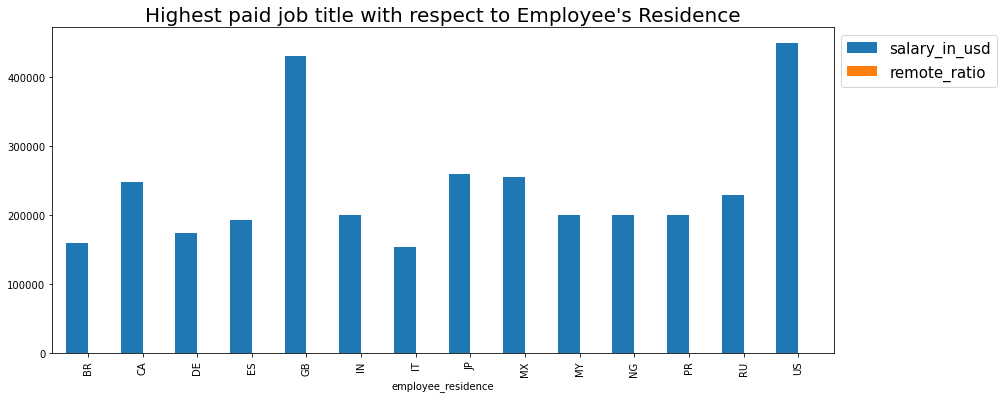

In [39]:
employee_res.plot(kind = 'bar', width = 0.8, figsize = (14,6))
plt.legend(bbox_to_anchor =(1,1), fontsize = 15)
plt.title("Highest paid job title with respect to Employee's Residence", fontsize = 20)
plt.show()

## PROBLEM 3
- Find out if the remote ratio affect salary earnings of the employees
- find out job_titles listed for remote
- find out if company location influences remote ratio

In [40]:
unique_remote_ratio = df['remote_ratio'].unique()
unique_remote_ratio

array([  0, 100,  50], dtype=int64)

In [41]:
# job title listed for remote
remote_jobs = df.loc[df['remote_ratio']!= 0].groupby('job_title')[['work_year','remote_ratio', 'salary_in_usd', 'experience_level']].max()
remote_jobs


,work_year,remote_ratio,salary_in_usd,experience_level
job_title,,,,
3D Computer Vision Researcher,2022,100,50000,SE
AI Programmer,2022,100,40000,EN
AI Scientist,2022,100,200000,SE
Analytics Engineer,2022,100,231250,SE
Applied Data Scientist,2022,100,380000,SE
...,...,...,...,...
Product Data Analyst,2022,100,140000,MI
Product Data Scientist,2022,100,8000,SE
Research Engineer,2023,100,240000,MI


C:\Users\user\AppData\Local\Temp\ipykernel_4408\1253296188.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['datetime'] = pd.to_datetime(df_filtered['work_year'], format='%Y') + MonthEnd(1)


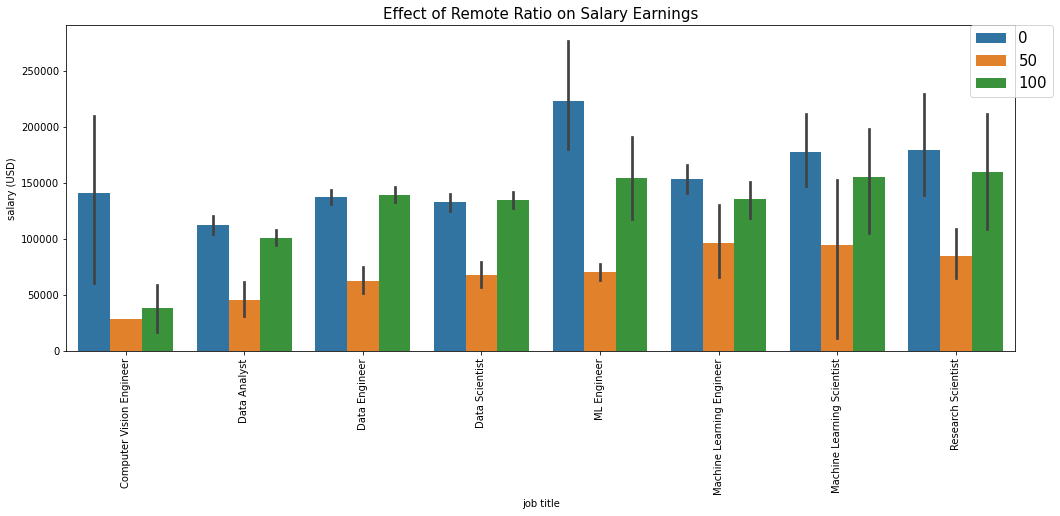

In [46]:
#using common_titles to get the effect remote ratio affecting salary earnings common to all years

common_titles = set(df['job_title'].unique())
for work_year in df['work_year'].unique():
    common_titles = common_titles.intersection(set(df[df['work_year']==work_year]['job_title'].unique()))

# filter the DataFrame to include only the common job titles
df_filtered = df[df['job_title'].isin(common_titles)]

# create the 'datetime' column
df_filtered['datetime'] = pd.to_datetime(df_filtered['work_year'], format='%Y') + MonthEnd(1)

# plot the bar chart
plt.figure(figsize=(17, 6))
ax = sns.barplot(data=df_filtered, x='job_title', y='salary_in_usd', hue='remote_ratio', order=sorted(df_filtered['job_title'].unique()))
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0, fontsize=15)
plt.title('Effect of Remote Ratio on Salary Earnings', fontsize=15)
plt.ylabel('salary (USD)', fontsize=10)
plt.xlabel('job title', fontsize=10)

# rotate x-axis labels to 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()


## PROBLEM 4
- Find out the impact of Experience Level on salaries

In [44]:
unique_items = df['experience_level'].unique()
unique_items

array(['MI', 'EN', 'SE', 'EX'], dtype=object)

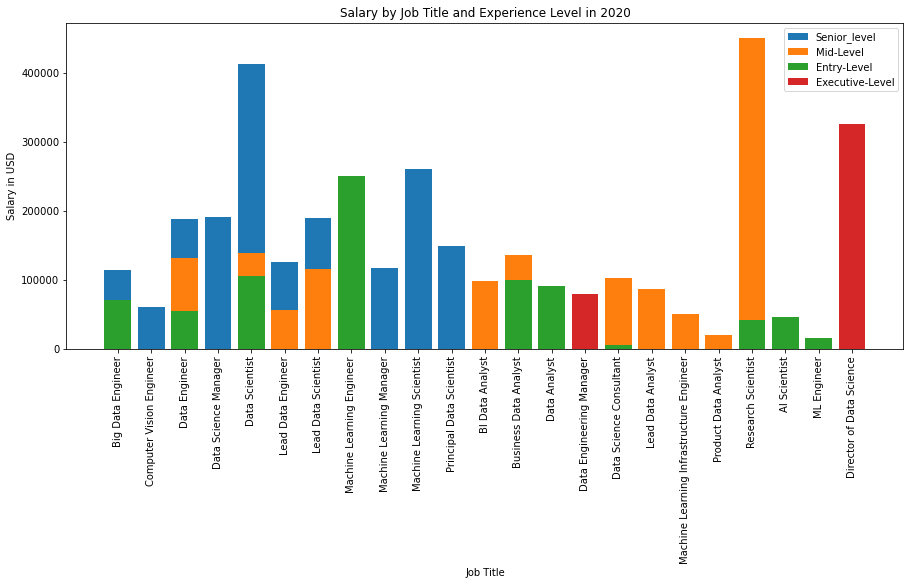

In [47]:
# Grouping the data by work_year, job_title, and experience_level for 2020

df_2020 = df.loc[df['work_year'] == 2020]
max_salary = df_2020.groupby(['work_year', 'job_title', 'experience_level'])[['salary_in_usd']].max()

senior_data = max_salary.loc[max_salary.index.get_level_values('experience_level') == 'SE']
entry_data = max_salary.loc[max_salary.index.get_level_values('experience_level') == 'EN']
mid_data = max_salary.loc[max_salary.index.get_level_values('experience_level') == 'MI']
executive_data = max_salary.loc[max_salary.index.get_level_values('experience_level') == 'EX']

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(senior_data.index.get_level_values('job_title'), senior_data['salary_in_usd'], label='Senior_level')
ax.bar(mid_data.index.get_level_values('job_title'), mid_data['salary_in_usd'], label='Mid-Level')
ax.bar(entry_data.index.get_level_values('job_title'), entry_data['salary_in_usd'], label='Entry-Level')
ax.bar(executive_data.index.get_level_values('job_title'), executive_data['salary_in_usd'], label='Executive-Level')


ax.set_xlabel('Job Title')
ax.set_ylabel('Salary in USD')
ax.set_title('Salary by Job Title and Experience Level in 2020')
ax.legend()

plt.xticks(rotation=90)
plt.show()

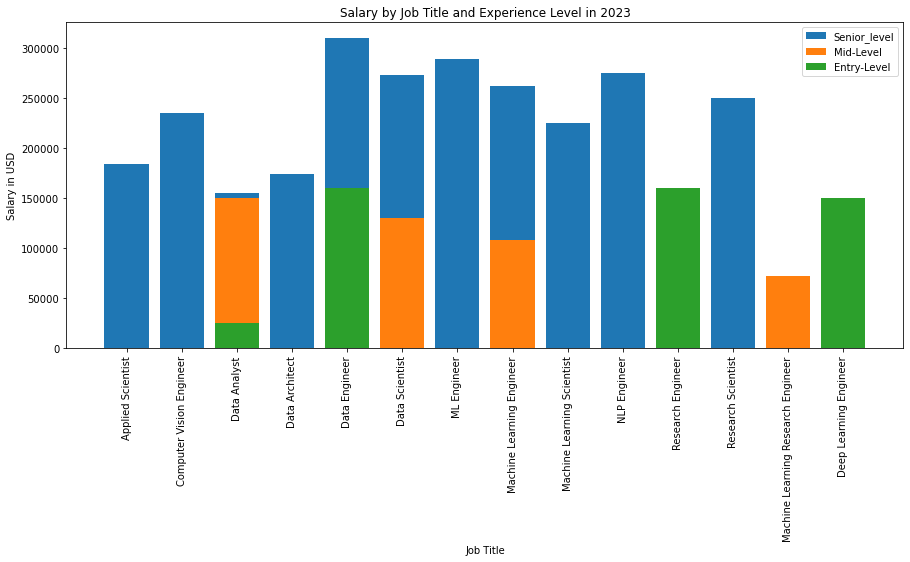

In [48]:
# Grouping the data by work_year, job_title, and experience_level for 2023

df_2023 = df.loc[df['work_year'] == 2023]
max_salary = df_2023.groupby(['work_year', 'job_title', 'experience_level'])[['salary_in_usd']].max()

senior_data = max_salary.loc[max_salary.index.get_level_values('experience_level') == 'SE']
entry_data = max_salary.loc[max_salary.index.get_level_values('experience_level') == 'EN']
mid_data = max_salary.loc[max_salary.index.get_level_values('experience_level') == 'MI']

fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(senior_data.index.get_level_values('job_title'), senior_data['salary_in_usd'], label='Senior_level')
ax.bar(mid_data.index.get_level_values('job_title'), mid_data['salary_in_usd'], label='Mid-Level')
ax.bar(entry_data.index.get_level_values('job_title'), entry_data['salary_in_usd'], label='Entry-Level')

ax.set_xlabel('Job Title')
ax.set_ylabel('Salary in USD')
ax.set_title('Salary by Job Title and Experience Level in 2023')
ax.legend()

plt.xticks(rotation=90)
plt.show()

## PROBLEM 5
- Comparing paid part-time vs full-time salary ratio

C:\Users\user\AppData\Local\Temp\ipykernel_4408\3045282253.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['datetime'] = pd.to_datetime(df_filtered['work_year'], format='%Y') + MonthEnd(1)


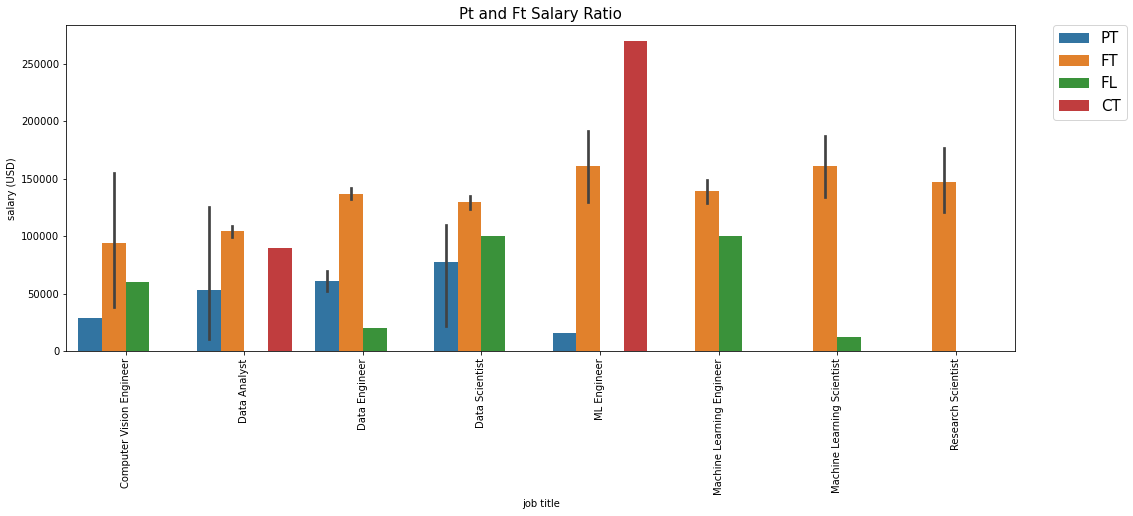

In [51]:
# Comparing paid part-time vs full-time salary ratio using common job titles present in all years
common_titles = set(df['job_title'].unique())
for work_year in df['work_year'].unique():
    common_titles = common_titles.intersection(set(df[df['work_year']==work_year]['job_title'].unique()))

# filter the DataFrame to include only the common job titles
df_filtered = df[df['job_title'].isin(common_titles)]

# create the 'datetime' column
df_filtered['datetime'] = pd.to_datetime(df_filtered['work_year'], format='%Y') + MonthEnd(1)

# plot the bar chart
plt.figure(figsize=(17, 6))
ax = sns.barplot(data=df_filtered, x='job_title', y='salary_in_usd', hue='employment_type', order=sorted(df_filtered['job_title'].unique()))
plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0, fontsize=15)
plt.title('Pt and Ft Salary Ratio', fontsize=15)
plt.ylabel('salary (USD)', fontsize=10)
plt.xlabel('job title', fontsize=10)

 # rotate x-axis labels to 90 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

plt.show()